In [1]:
import tensorflow as tf
tf.__version__
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.rc("font",size=14 )
plt.rc("axes", labelsize=14, titlesize=12 )
plt.rc("legend", fontsize=14 )
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

In [3]:
tf.keras.utils.get_file(fname="ridership.tgz",
                        origin="https://github.com/ageron/data/raw/main/ridership.tgz",
                        cache_dir=".",
                       extract=True)

'.\\datasets\\ridership.tgz'

In [4]:
import pandas as pd

In [5]:
path = "datasets/ridership/CTA_-_Ridership_-_Daily_Boarding_Totals.csv"
df = pd.read_csv(path,parse_dates=["service_date"])

In [6]:
df

,service_date,day_type,bus,rail_boardings,total_rides
0,2001-01-01,U,297192,126455,423647
1,2001-01-02,W,780827,501952,1282779
2,2001-01-03,W,824923,536432,1361355
3,2001-01-04,W,870021,550011,1420032
4,2001-01-05,W,890426,557917,1448343
...,...,...,...,...,...
7696,2021-11-26,W,257700,189694,447394
7697,2021-11-27,A,237839,187065,424904
7698,2021-11-28,U,184817,147830,332647
7699,2021-11-29,W,421322,276090,697412


In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df = df.set_index("service_date")

In [10]:
df = df.sort_index()

In [11]:
df = df.drop(columns="total_rides")

In [12]:
df.dtypes

day_type          object
bus                int64
rail_boardings     int64
dtype: object

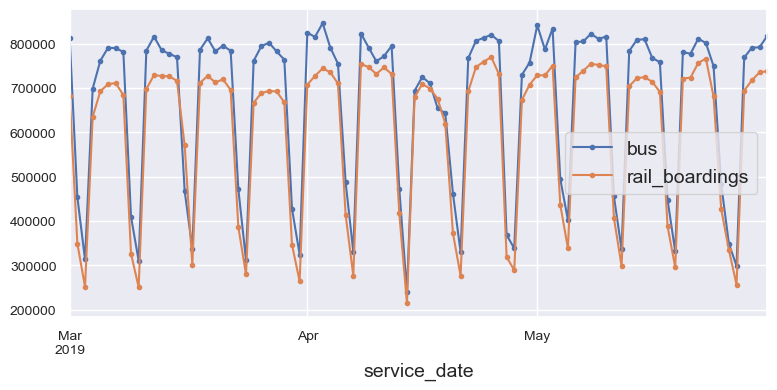

In [13]:
df["2019-03":"2019-05"].plot(grid=True, marker=".", figsize=(9,4))
plt.show()

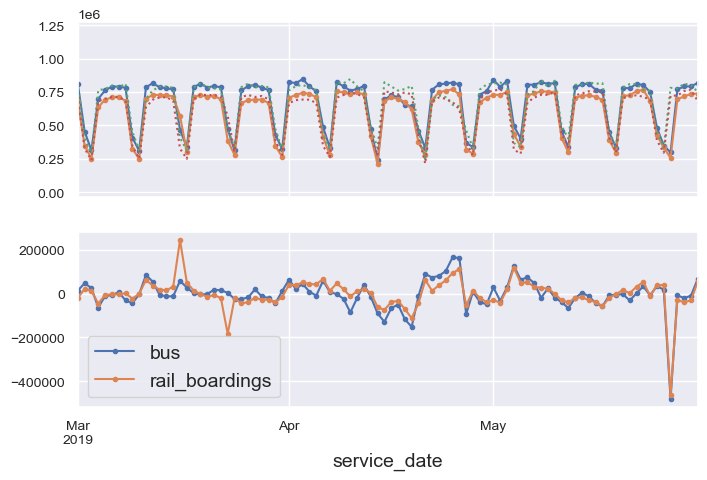

In [14]:
# weekly
diff_7 = df[["bus","rail_boardings"]].diff(7)["2019-03":"2019-05"]
fig, axs= plt.subplots(2,1, sharex=True, figsize=(8,5))
df.plot(ax=axs[0], legend=False, marker=".")
df.shift(7).plot(ax =axs[0], grid=True, legend=False, linestyle=":")
diff_7.plot(ax=axs[1], grid=True, marker=".")
plt.show()

In [15]:
df.loc["2019-05-25":"2019-05-27"]["day_type"]

service_date
2019-05-25    A
2019-05-26    U
2019-05-27    U
Name: day_type, dtype: object

In [16]:
diff_7.abs().mean()

bus               43915.608696
rail_boardings    42143.271739
dtype: float64

In [17]:
# More about diff
# Absolute error
# Mean absolute percentage error

In [18]:
# Mean Absolute Error:
targets = df[["bus","rail_boardings"]]["2019-03":"2019-05"]
(diff_7/targets).abs().mean()

bus               0.082938
rail_boardings    0.089948
dtype: float64

In [19]:
period = slice("2001","2019")

In [20]:
period

slice('2001', '2019', None)

In [21]:
df.dtypes

day_type          object
bus                int64
rail_boardings     int64
dtype: object

In [22]:
pd.set_option("display.precision", 2)

In [23]:
df_monthly = df.resample("M")[["bus","rail_boardings"]].mean()
rolling_avg_12_months = df_monthly[period].rolling(window=12).mean()
# df_monthly

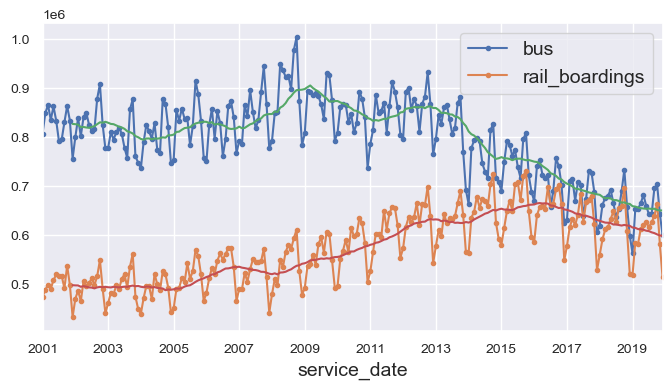

In [24]:
fig, ax = plt.subplots(figsize=(8,4))
df_monthly[period].plot(ax = ax, marker = ".")
rolling_avg_12_months.plot(ax = ax, grid = True, legend = False)
plt.show();

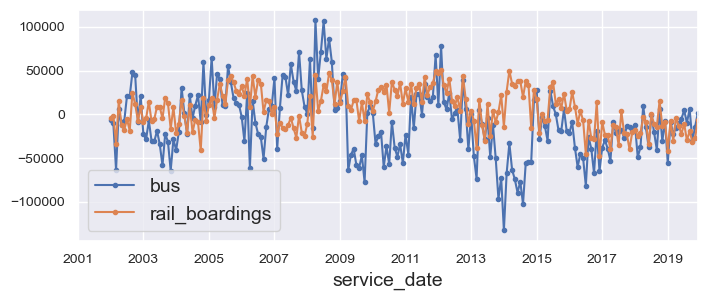

In [25]:
df_monthly.diff(12)[period].plot(grid = True, marker = ".", figsize=(8,3))
plt.show();

In [26]:
from statsmodels.tsa.arima.model import ARIMA

In [27]:
origin, today = "2019-01-01", "2019-05-31"

In [28]:
rail_Series = df.loc[origin:today]["rail_boardings"].asfreq("D")

In [29]:
model = ARIMA(rail_Series, order=(1,0,0), seasonal_order=(0,1,1,7))

In [30]:
model = model.fit()

In [31]:
y_pred = model.forecast()

In [32]:
y_pred

2019-06-01    427758.63
Freq: D, dtype: float64

In [33]:
# actual value:
df["rail_boardings"].loc["2019-06-01"]

379044

In [34]:
# naive forecast : value from week earlier:
df["rail_boardings"].loc["2019-05-25"]

426932

In [35]:
origin, start_date, end_date = "2019-01-01", "2019-03-01", "2019-05-31"

In [36]:
time_period = pd.date_range(start_date, end_date,)

In [37]:
rail_series = df.loc[origin:end_date]["rail_boardings"].asfreq("D")

In [38]:
y_preds= []

In [39]:
time_period.shift(-1)

DatetimeIndex(['2019-02-28', '2019-03-01', '2019-03-02', '2019-03-03',
               '2019-03-04', '2019-03-05', '2019-03-06', '2019-03-07',
               '2019-03-08', '2019-03-09', '2019-03-10', '2019-03-11',
               '2019-03-12', '2019-03-13', '2019-03-14', '2019-03-15',
               '2019-03-16', '2019-03-17', '2019-03-18', '2019-03-19',
               '2019-03-20', '2019-03-21', '2019-03-22', '2019-03-23',
               '2019-03-24', '2019-03-25', '2019-03-26', '2019-03-27',
               '2019-03-28', '2019-03-29', '2019-03-30', '2019-03-31',
               '2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05', '2019-04-06', '2019-04-07', '2019-04-08',
               '2019-04-09', '2019-04-10', '2019-04-11', '2019-04-12',
               '2019-04-13', '2019-04-14', '2019-04-15', '2019-04-16',
               '2019-04-17', '2019-04-18', '2019-04-19', '2019-04-20',
               '2019-04-21', '2019-04-22', '2019-04-23', '2019-04-24',
      

In [40]:
for today in time_period.shift(-1):
    model = ARIMA(rail_series[origin:today],
                 order=(1,0,0),
                 seasonal_order=(0,1,1,7))
    model =model.fit()
    y_pred = model.forecast()[0]
    y_preds.append(y_pred)

y_preds = pd.Series(y_preds, index = time_period)
mae = (y_preds - rail_series[time_period]).abs().mean()

In [41]:
mae

32040.720103632397

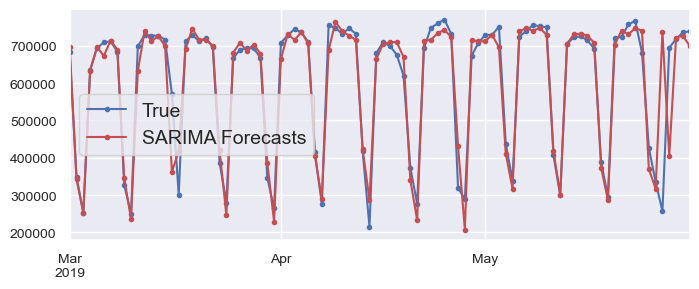

In [42]:
# extra code – displays the SARIMA forecasts
fig, ax = plt.subplots(figsize=(8, 3))
rail_series.loc[time_period].plot(label="True", ax=ax, marker=".", grid=True)
ax.plot(y_preds, color="r", marker=".", label="SARIMA Forecasts")
plt.legend()
plt.show()

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

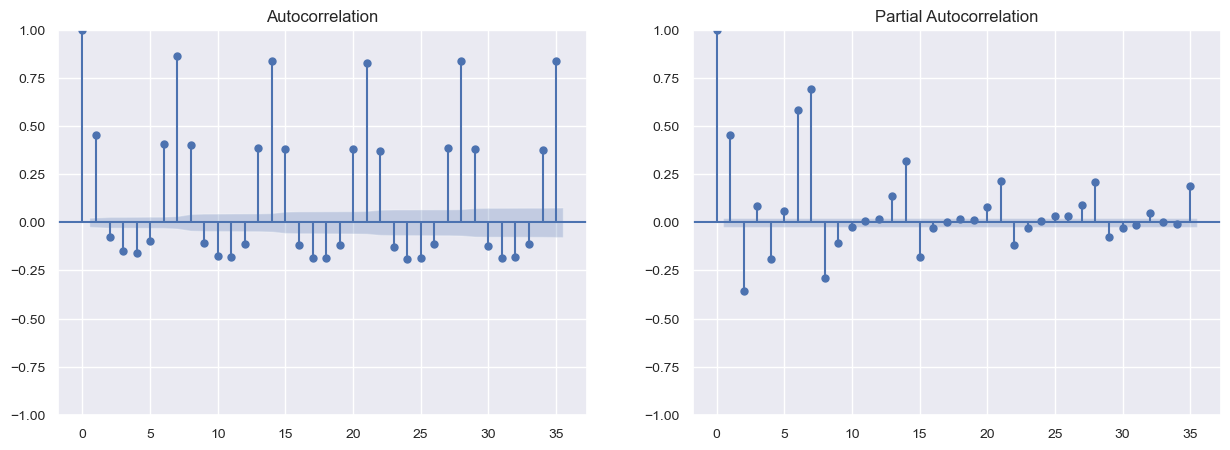

In [44]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plot_acf(df["rail_boardings"][period], ax=axs[0], lags=35)
# axs[0].grid()
plot_pacf(df["rail_boardings"][period], ax=axs[1], lags=35)
# axs[1].grid()
plt.show()

### Neural Networks:

In [45]:
import tensorflow as tf

In [47]:
my_series = [i for i in range(6)]

In [51]:
my_dataset = tf.keras.utils.timeseries_dataset_from_array(my_series,
                                                           targets=my_series[3:],
                                                           sequence_length=3,
                                                           batch_size=2
                                                          )

In [54]:
list(my_dataset)

[(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
  array([[0, 1, 2],
         [1, 2, 3]])>,
  <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 4])>),
 (<tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[2, 3, 4]])>,
  <tf.Tensor: shape=(1,), dtype=int32, numpy=array([5])>)]

In [57]:
list(tf.data.Dataset.range(6))

[<tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=3>,
 <tf.Tensor: shape=(), dtype=int64, numpy=4>,
 <tf.Tensor: shape=(), dtype=int64, numpy=5>]

In [67]:
for i in tf.data.Dataset.range(6).window(4, shift=1):
    for x in i:
        print(f"{x}", end=" ")
    print()

0 1 2 3 
1 2 3 4 
2 3 4 5 
3 4 5 
4 5 
5 


In [69]:
for i in tf.data.Dataset.range(6).window(4, shift=1):
    for x in i:
        print(f"{x}", end=" ")
    print()

0 1 2 3 
1 2 3 4 
2 3 4 5 
3 4 5 
4 5 
5 


In [77]:
# drop_remainder = True
dataset = tf.data.Dataset.range(6).window(4,shift=1, drop_remainder=True)

In [83]:
for i in dataset:
    for x in i:
        print(f"{x}", end = " ")
    print()

0 1 2 3 
1 2 3 4 
2 3 4 5 


In [72]:
# falt_map()
dataset = dataset.flat_map(lambda ds: ds.batch(4))

In [76]:
for i in dataset:
    print(f"{i}")

[0 1 2 3]
[1 2 3 4]
[2 3 4 5]


In [85]:
def to_window(dataset, length):
    """
    This function takes in tf dataset and length to make sequences of look back periods
    """
    dataset = dataset.window(length, shift=1, drop_remainder = True)
    return dataset.flat_map(lambda ds : ds.batch(length))

In [86]:
dataset  = to_window(tf.data.Dataset.range(6), 4)

In [88]:
for i in dataset:
    print(f"{i}")

[0 1 2 3]
[1 2 3 4]
[2 3 4 5]


### Data Prep of original dataset:

In [89]:
rail_train = df[["rail_boardings"]]["2016-01":"2018-12"] / 1e6
rail_val = df[["rail_boardings"]]["2019-01":"2019-05"] / 1e6
rail_test = df[["rail_boardings"]]["2019-06":] / 1e6

In [90]:
# making sequences:
seq_length = 56
train_ds = tf.keras.utils.timeseries_dataset_from_array(rail_train.to_numpy(),
                                                        targets=rail_train[seq_length:],
                                                        sequence_length=seq_length,
                                                        batch_size=32,
                                                        shuffle=True,
                                                        seed=42
                                                       )

val_ds = tf.keras.utils.timeseries_dataset_from_array(rail_val.to_numpy(),
                                                        targets=rail_val[seq_length:],
                                                        sequence_length=seq_length,
                                                        batch_size=32,
                                                     )

In [ ]:
2